<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/Spearman_corr_all_compounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import seaborn as sns

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [60]:
df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Filtered_Result_With_Detection_Frequency_02.csv')
print(df.head())
print(df.columns)
print(df.index)
# Set the index to the "Unnamed: 0" column
df = df.drop(columns=['Formula (mol ion)', 'Detection Frequency']).set_index('Unnamed: 0')
print(df.head())

                                          Unnamed: 0 Formula (mol ion)  \
0             Sulfurous acid, di(2-ethylhexyl) ester         C16H34O3S   
1  Piperazine, 1,1'-(1,2-diphenylethane-1,2-diyl)...          C24H34N4   
2  1,2-Benzenediol, O-acetoxyacetyl-O'-(4-butylbe...          C21H22O6   
3  Benzoic acid, 4-(4-butylcyclohexyl)-, 2,3-dicy...        C27H30N2O3   
4          1,2-Benzenediol, O,O'-di(4-butylbenzoyl)-          C28H30O4   

   Detection Frequency  Auto_5_gp_df  Auto_4_gp_df  Auto_3_gp_df  \
0             0.214286      0.000000           0.0      0.022836   
1             0.214286      0.000000           0.0      0.032296   
2             0.285714      0.000000           0.0      0.000000   
3             0.285714      0.004778           0.0      0.040192   
4             0.214286      0.000000           0.0      0.000000   

   Auto_2_gp_df  Auto_1_gp_df  Zafira_2_gp_df  Zafira_1_gp_df  Auto_5_pm_df  \
0      0.000000      0.000000        0.000000        0.007941      

In [61]:
compound_columns = [col for col in df.columns if '_gp_df' in col]

# Creating a new dataframe with only the relevant columns
compound_df = df[compound_columns]

# Calculating the Spearman rank correlation
correlation_matrix_gp_samples = compound_df.corr(method='spearman')

# Displaying the result
print(correlation_matrix_gp_samples)

                Auto_5_gp_df  Auto_4_gp_df  Auto_3_gp_df  Auto_2_gp_df  \
Auto_5_gp_df        1.000000      0.064161      0.161990      0.091807   
Auto_4_gp_df        0.064161      1.000000      0.165482      0.150869   
Auto_3_gp_df        0.161990      0.165482      1.000000      0.132901   
Auto_2_gp_df        0.091807      0.150869      0.132901      1.000000   
Auto_1_gp_df        0.200623      0.114382      0.125019      0.206185   
Zafira_2_gp_df     -0.142912     -0.163024     -0.031283     -0.000391   
Zafira_1_gp_df     -0.136944     -0.044066     -0.023152     -0.114575   

                Auto_1_gp_df  Zafira_2_gp_df  Zafira_1_gp_df  
Auto_5_gp_df        0.200623       -0.142912       -0.136944  
Auto_4_gp_df        0.114382       -0.163024       -0.044066  
Auto_3_gp_df        0.125019       -0.031283       -0.023152  
Auto_2_gp_df        0.206185       -0.000391       -0.114575  
Auto_1_gp_df        1.000000       -0.141253       -0.056222  
Zafira_2_gp_df     -0.141253 

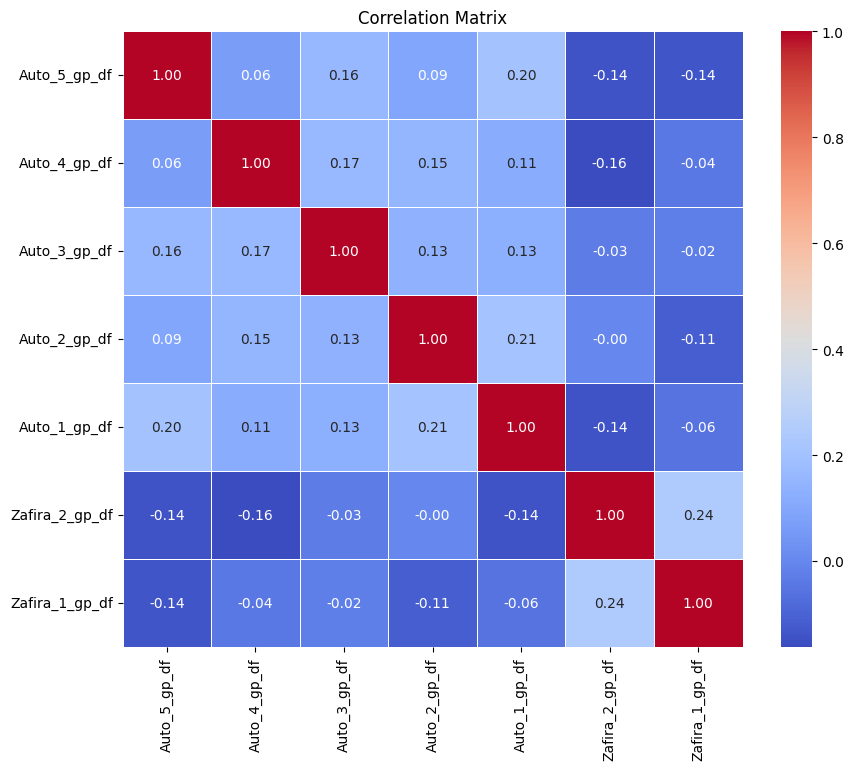

In [62]:
correlation_df_gp = correlation_matrix_gp_samples.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df_gp, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_gp_all_compounds.png', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
# Calculate Spearman rank correlation matrix
correlation_matrix_total = df.corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix_total)

                Auto_5_gp_df  Auto_4_gp_df  Auto_3_gp_df  Auto_2_gp_df  \
Auto_5_gp_df        1.000000      0.064161      0.161990      0.091807   
Auto_4_gp_df        0.064161      1.000000      0.165482      0.150869   
Auto_3_gp_df        0.161990      0.165482      1.000000      0.132901   
Auto_2_gp_df        0.091807      0.150869      0.132901      1.000000   
Auto_1_gp_df        0.200623      0.114382      0.125019      0.206185   
Zafira_2_gp_df     -0.142912     -0.163024     -0.031283     -0.000391   
Zafira_1_gp_df     -0.136944     -0.044066     -0.023152     -0.114575   
Auto_5_pm_df       -0.028669      0.044242     -0.112637     -0.051844   
Auto_4_pm_df       -0.024001     -0.042043     -0.101403     -0.069276   
Auto_3_pm_df       -0.094175     -0.039382     -0.176786     -0.036644   
Auto_2_pm_df       -0.025506      0.052901     -0.084201     -0.038431   
Auto_1_pm_df       -0.043864     -0.181721     -0.176903     -0.115981   
Zafira_2_pm_df     -0.175817     -0.10

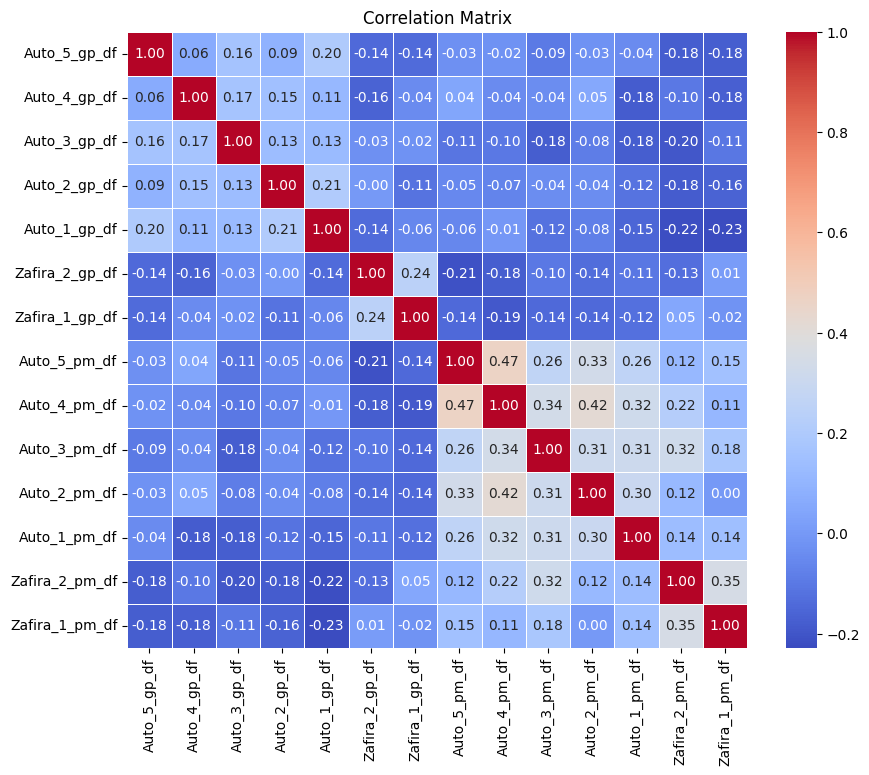

In [64]:
correlation_df_gp = correlation_matrix_total.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df_gp, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_all_compounds.png', dpi=300, bbox_inches='tight')
plt.show()

In [65]:
df_transposed = df.transpose()

# Calculate Spearman rank correlation matrix
correlation_matrix_compounds = df_transposed.corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix_compounds)

Unnamed: 0                                          Sulfurous acid, di(2-ethylhexyl) ester  \
Unnamed: 0                                                                                   
Sulfurous acid, di(2-ethylhexyl) ester                                            1.000000   
Piperazine, 1,1'-(1,2-diphenylethane-1,2-diyl)b...                                0.634043   
1,2-Benzenediol, O-acetoxyacetyl-O'-(4-butylben...                                0.080443   
Benzoic acid, 4-(4-butylcyclohexyl)-, 2,3-dicya...                                0.601405   
1,2-Benzenediol, O,O'-di(4-butylbenzoyl)-                                         0.038298   
...                                                                                    ...   
Heptane, 3-ethyl-                                                                -0.268085   
Tetraethoxymethane                                                               -0.362866   
Triisopropylphosphate                                       

In [ ]:
plt.figure(figsize=(120, 100))

# Create a heatmap
sns.heatmap(correlation_matrix_compounds, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_compounds_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
row_linkage = hierarchy.linkage(correlation_matrix_compounds, method='average')
row_order = hierarchy.dendrogram(row_linkage, no_plot=True)['leaves']

# Make sure row_order is within the valid range of indices
row_order = [i for i in row_order if i < len(df_transposed)]

# Reorder the DataFrame based on hierarchical clustering
df_reordered = df_transposed.iloc[row_order]

# Set up the matplotlib figure
plt.figure(figsize=(120, 00))

# Create a heatmap
sns.heatmap(df_reordered.corr(method='spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_compounds_analysis_clustered.png', dpi=300, bbox_inches='tight')
plt.show()